# 台灣銀行牌告匯率爬蟲練習
## 範例1： 練習爬取台幣對其他貨幣匯率資料

In [1]:
import requests
from bs4 import BeautifulSoup
from datetime import datetime
import pandas as pd
import matplotlib.pyplot as plt

### 進入台灣銀行牌告匯率網頁：https://rate.bot.com.tw/xrt?Lang=zh-TW ，擷取當日台幣對美金的匯率資訊

In [2]:
# 進入台灣銀行牌告匯率網頁，查看當日匯率資料
url = "https://rate.bot.com.tw/xrt?Lang=zh-TW"
resp = requests.get(url)
resp.encoding = 'utf-8'
# print(resp.text)  # 如有需要，列印出網頁原始碼

html = BeautifulSoup(resp.text, "lxml")
rate_table = html.find(name='table', attrs={'title':'牌告匯率'}).find(name='tbody').find_all(name='tr')

# 查詢美金(也就是匯率表的第一個元素)對台幣的匯率
currency = rate_table[0].find(name='div', attrs={'class':'visible-phone print_hide'})
print(currency.get_text().replace(" ", ""))  # 去掉空白

buy_rate = rate_table[0].find(name='td', attrs={'data-table':'本行現金買入'})
sell_rate = rate_table[0].find(name='td', attrs={'data-table':'本行現金賣出'})
print("即時現金買入: %s, 即時現金賣出: %s" % (buy_rate.get_text(), sell_rate.get_text()))


美金(USD)

即時現金買入: 30.96, 即時現金賣出: 31.63


### 作業part 1：請參考上面的範例，試著爬取所有貨幣對台幣的匯率

In [ ]:
import requests
from bs4 import BeautifulSoup 
url = "https://rate.bot.com.tw/xrt?Lang=zh-TW"
r = requests.get(url)
r.encoding = "utf-8"
response = r.text 

html = BeautifulSoup(response,"lxml")
rate_table = html.find(name="table",attrs={"title":"牌告匯率"})

'''
#列印出幣別-美金(USD)
currency = rate_table.find(name="div",attrs = {"class":"visible-phone print_hide"})
print(currency.string.replace(" ","")) 

#現金買入、賣出-美金(USD)
buy_rate = rate_table.find(name="td",attrs={"data-table":"本行現金買入"})
print("即時現金買入:",buy_rate.string)'''

sell_rate = rate_table.find(name="td",attrs={"data-table":"本行現金賣出"})
print("即時現金賣出:",sell_rate.string)

currency_li= []
buy_rate_li = []
sell_rate_li = []

#所有貨幣幣別
currency = rate_table.find_all(name="div",attrs = {"class":"visible-phone print_hide"})
for c in currency:
    cur = c.string.replace(" ","").replace("\n","")
    currency_li.append(cur)


#現金買入、賣出-所有貨幣
buy_rate = rate_table.find_all(name="td",attrs={"data-table":"本行現金買入"})
for br in buy_rate:
    buy = br.string
    if buy not in buy_rate_li:
        buy_rate_li.append(buy)

sell_rate = rate_table.find_all(name="td",attrs={"data-table":"本行現金賣出"})
for sr in sell_rate:
    sell = sr.string
    if sell not in sell_rate_li:
        sell_rate_li.append(sell)

for i in range(len(currency_li)):
    print(currency_li[i])
    print("即時現金買入:",buy_rate_li[i])
    print("即時現金賣出:",sell_rate_li[i])

## 範例2：爬取一個月的美金對台幣歷史匯率資料，並畫出趨勢圖


美金(USD)



<Figure size 720x576 with 0 Axes>

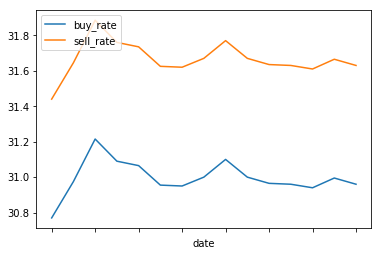

In [4]:
# 先到牌告匯率首頁，爬取所有貨幣的種類
url = "https://rate.bot.com.tw/xrt?Lang=zh-TW"
resp = requests.get(url)
resp.encoding = 'utf-8'
html = BeautifulSoup(resp.text, "lxml")
rate_table = html.find(name='table', attrs={'title':'牌告匯率'}).find(name='tbody').find_all(name='tr')

# 擷取匯率表格，把美金(也就是匯率表的第一個元素)擷取出來，查詢其歷史匯率
currency = rate_table[0].find(name='div', attrs={'class':'visible-phone print_hide'})
print(currency.get_text().replace(" ", ""))  # 貨幣種類

# 針對美金，找到其「歷史匯率」的首頁 
history_link = rate_table[0].find(name='td', attrs={'data-table':'歷史匯率'})
history_rate_link = "https://rate.bot.com.tw" + history_link.a["href"]  # 該貨幣的歷史資料首頁

#
# 到貨幣歷史匯率網頁，選則該貨幣的「歷史區間」，送出查詢後，觀察其網址變化情形，再試著抓取其歷史匯率資料
#
# 用「quote/年-月」去取代網址內容，就可以連到該貨幣的歷史資料
quote_history_url = history_rate_link.replace("history", "quote/2019-08")
resp = requests.get(quote_history_url)
resp.encoding = 'utf-8'
history = BeautifulSoup(resp.text, "lxml")
history_table = history.find(name='table', attrs={'title':'歷史本行營業時間牌告匯率'}).find(name='tbody').find_all(name='tr')

#
# 擷取到歷史匯率資料後，把資料彙整起來並畫出趨勢圖
#
date_history = list()
history_buy = list()
history_sell = list()

for history_rate in history_table:
    # 擷取日期資料
    date_string = history_rate.a.get_text()
    date = datetime.strptime(date_string, '%Y/%M/%d').strftime('%Y/%M/%d')  # 轉換日期格式
    date_history.append(date)  # 日期歷史資料

    history_ex_rate = history_rate.find_all(name='td', attrs={'class':'rate-content-cash text-right print_table-cell'})
    history_buy.append(float(history_ex_rate[0].get_text()))  # 歷史買入匯率
    history_sell.append(float(history_ex_rate[1].get_text()))  # 歷史賣出匯率

# 將匯率資料建成dataframe形式
HistoryExchangeRate = pd.DataFrame({'date': date_history,
                                    'buy_rate':history_buy,
                                    'sell_rate':history_sell})

HistoryExchangeRate = HistoryExchangeRate.set_index('date')  # 指定日期欄位為datafram的index
HistoryExchangeRate = HistoryExchangeRate.sort_index(ascending=True)

# 畫出歷史匯率軌跡圖
plt.figure(figsize=(10, 8))
HistoryExchangeRate[['buy_rate','sell_rate']].plot()  # x=['date'], y=[['buy_rate','sell_rate']] 
plt.legend(loc="upper left")
plt.show()

### 作業part 2：爬取每種貨幣對台幣的一個月歷史匯率資料，並畫出趨勢圖

In [28]:
import requests
from bs4 import BeautifulSoup
from datetime import datetime
import pandas as pd
import matplotlib.pyplot as plt
url = "https://rate.bot.com.tw/xrt?Lang=zh-TW"
resp = requests.get(url)
resp.encoding = "utf-8"
response = resp.text
html = BeautifulSoup(response,"lxml")
rate_table = html.find(name="table",attrs={"title":"牌告匯率"}).find(name="tbody").find_all(name="tr")


# 擷取到歷史匯率資料後，把資料彙整起來並畫出趨勢圖
date_history = {}
history_buy = {}
history_sell = {}
    

# 擷取匯率表格，把美金(也就是匯率表的第一個元素)擷取出來，查詢其歷史匯率
for i in range(len(rate_table)):
    currency = rate_table[i].find(name='div', attrs={'class':'visible-phone print_hide'})
    cur_name = currency.get_text().replace(" ", "").replace("\r","").replace("\n","")
      

# 針對美金，找到其「歷史匯率」的首頁 
    history_link = rate_table[i].find(name='td', attrs={'data-table':'歷史匯率'})
    history_rate_link = "https://rate.bot.com.tw" + history_link.a["href"]  # 該貨幣的歷史資料首頁

# 用「quote/年-月」去取代網址內容，就可以連到該貨幣的歷史資料
    quote_history_url = history_rate_link.replace("history", "quote/2020-11")
    resp = requests.get(quote_history_url)
    resp.encoding = 'utf-8'
    history = BeautifulSoup(resp.text, "lxml")
    history_table = history.find(name='table', attrs={'title':'歷史本行營業時間牌告匯率'}).find(name='tbody').find_all(name='tr')

    
    for history_rate in history_table:
    # 擷取日期資料
        date_string = history_rate.a.get_text()
        date = datetime.strptime(date_string, '%Y/%M/%d').strftime('%Y/%M/%d')  # 轉換日期格式
        if cur_name not in date_history.keys():
            date_history[cur_name] = date
        else:
            date_history[cur_name]+= date  # 日期歷史資料

        history_ex_rate = history_rate.find_all(name='td', attrs={'class':'rate-content-cash text-right print_table-cell'})
        if cur_name not in history_buy.keys():
            history_buy[cur_name] = str(float(history_ex_rate[0].get_text()))  # 歷史買入匯率
        else:
            history_buy[cur_name] += str(float(history_ex_rate[0].get_text()))
        
        if cur_name not in history_sell.keys():
            history_sell[cur_name] =str(float(history_ex_rate[1].get_text()))  # 歷史賣出匯率
        else:
            history_sell[cur_name] +=str(float(history_ex_rate[1].get_text()))
        
print(date_history)
print("----------------------")
print(history_buy)
print("----------------------")
print(history_sell)

# 將匯率資料建成dataframe

HistoryExchangeRate =pd.Series({'date': date_history[cur_name],'buy_rate':history_buy[cur_name],'sell_rate':history_sell[cur_name]})
#HistoryExchangeRate = HistoryExchangeRate.set_index('date')  # 指定日期欄位為datafram的index
HistoryExchangeRate = HistoryExchangeRate.sort_index(ascending=True) #順序顛倒成8/1-8/30
# 畫出歷史匯率軌跡圖
'''plt.figure(figsize=(10, 8))
        HistoryExchangeRate[history_buy[cur_name],[history_sell[cur_name]]].plot()  # x=['date'], y=[['buy_rate','sell_rate']] 
        plt.legend(loc="upper left")
        plt.show()'''



'''

  Your code here

'''

{'美金(USD)': '2020/11/302020/11/272020/11/262020/11/252020/11/242020/11/232020/11/202020/11/192020/11/182020/11/172020/11/162020/11/132020/11/122020/11/112020/11/102020/11/092020/11/062020/11/052020/11/042020/11/032020/11/02', '港幣(HKD)': '2020/11/302020/11/272020/11/262020/11/252020/11/242020/11/232020/11/202020/11/192020/11/182020/11/172020/11/162020/11/132020/11/122020/11/112020/11/102020/11/092020/11/062020/11/052020/11/042020/11/032020/11/02', '英鎊(GBP)': '2020/11/302020/11/272020/11/262020/11/252020/11/242020/11/232020/11/202020/11/192020/11/182020/11/172020/11/162020/11/132020/11/122020/11/112020/11/102020/11/092020/11/062020/11/052020/11/042020/11/032020/11/02', '澳幣(AUD)': '2020/11/302020/11/272020/11/262020/11/252020/11/242020/11/232020/11/202020/11/192020/11/182020/11/172020/11/162020/11/132020/11/122020/11/112020/11/102020/11/092020/11/062020/11/052020/11/042020/11/032020/11/02', '加拿大幣(CAD)': '2020/11/302020/11/272020/11/262020/11/252020/11/242020/11/232020/11/202020/11/192020/

'\n\n  Your code here\n\n'